In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
    
import sys  
sys.path.insert(0, '../src/')
from jsm_massfunc import CSMF, cumulative, CSMF_old, H2H_CSMF
from jsm_datareduc import prep_data
import galhalo


>>> Normalizing primordial power spectrum P(k)=(k/k_0)^n_s ...
    such that sigma(R=8Mpc/h) =   0.8000.
>>> Tabulating sigma(M,z=0) ...
    From now on, sigma(M,z) is computed by interpolation.
>>> Tabulating z(W) and z(t_lkbk)...
>>> Preparing output redshifts for merger trees ...
    Number of output redshifts =  354, up to z = 20.06
>>> Tabulating Parkinson+08 J(u_res) ...
>>> Building interpolation grid for Green+19 M(<r|f_b,c)...
>>> Building interpolation grid for Green+19 sigma(r|f_b,c)...
>>> Building interpolation grid for Green+19 d2Phidr2(r|f_b,c)...
>>> Building interpolator for Jiang+15 orbit sampler...


In [3]:
Mh = prep_data("../../data/12_4_0/numpy/acc_surv_mass.npy", convert=False)
Ms = prep_data("../../data/12_4_0/numpy/acc_surv_mass.npy")

In [4]:
scatter_pix = 25
scatter_range = np.round(np.linspace(0.0,1.5,scatter_pix), 3)
N_samples=500
N_iter=1000 # this will stop us from running into the memory issue
mass_range = np.log10(np.logspace(3,10,50))

### lets show the original version of the SHMR

In [5]:
#now to loop over each value of scatter, now to loop for every realization, and every subhalo!

mat = np.zeros(shape=(scatter_pix, N_iter, N_samples, Mh.shape[1]))

for k, sigma in enumerate(scatter_range):

    scatter_mat = galhalo.lgMs_D22_dex(Mh[0:N_iter], sigma, N_samples, norm=True)

    mat[k] = scatter_mat

In [6]:
np.save("../../data/4D_scatter_n.npy", mat)

In [7]:
new_mat = np.zeros(shape=(scatter_pix,N_samples,3,50))

for k in range(scatter_pix):

    for n in range(N_samples):
  
        new_mat[k,n] = CSMF(mat[k,:,n,:], mass_range)

In [8]:
np.save("../../data/4D_CSMF_n.npy", new_mat)

In [9]:
across_samp = np.average(new_mat, axis=1) # now lets look at the values!!

meds = across_samp[:,1,:]

In [10]:
norm = mpl.colors.Normalize(vmin=scatter_range.min(), vmax=scatter_range.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.viridis)

colors = mpl.cm.viridis(np.linspace(0, 1, scatter_pix))

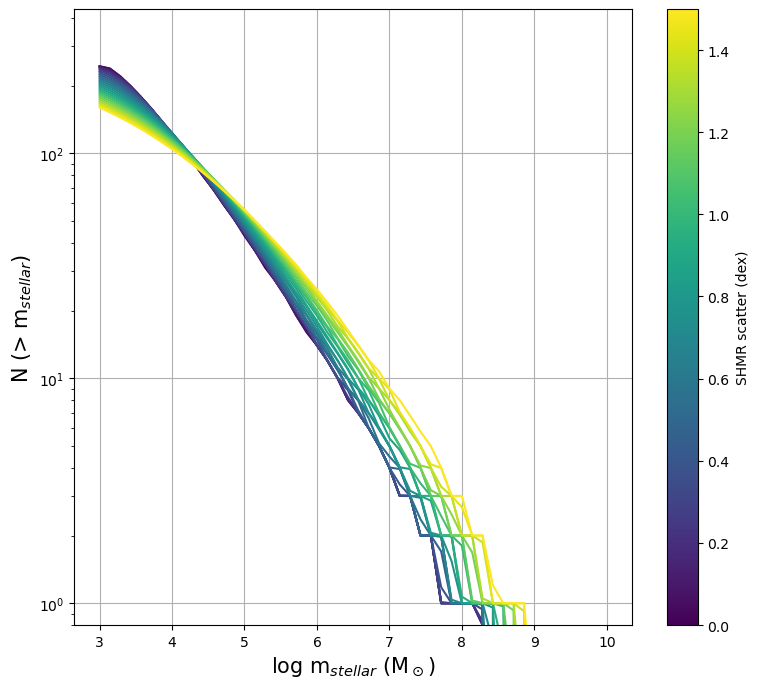

In [11]:
plt.figure(figsize=(9, 8)) # now plotting the color-coded CSMF!!

for i in range(scatter_pix):
    #plt.plot(mass_range, across_samp[i][2], color=colors[i])
    plt.plot(mass_range, across_samp[i][1], color=colors[i])
    #plt.plot(mass_range, across_samp[i][0], color=colors[i])


plt.yscale("log")
plt.grid()
plt.colorbar(cmap, label="SHMR scatter (dex)")
plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("N (> m$_{stellar}$)", fontsize=15)
plt.ylim(0.8)
plt.show()

In [12]:
CSMF_mat = CSMF(Ms[0:N_iter], mass_range)

low = CSMF_mat[0]
median = CSMF_mat[1]
high = CSMF_mat[2]

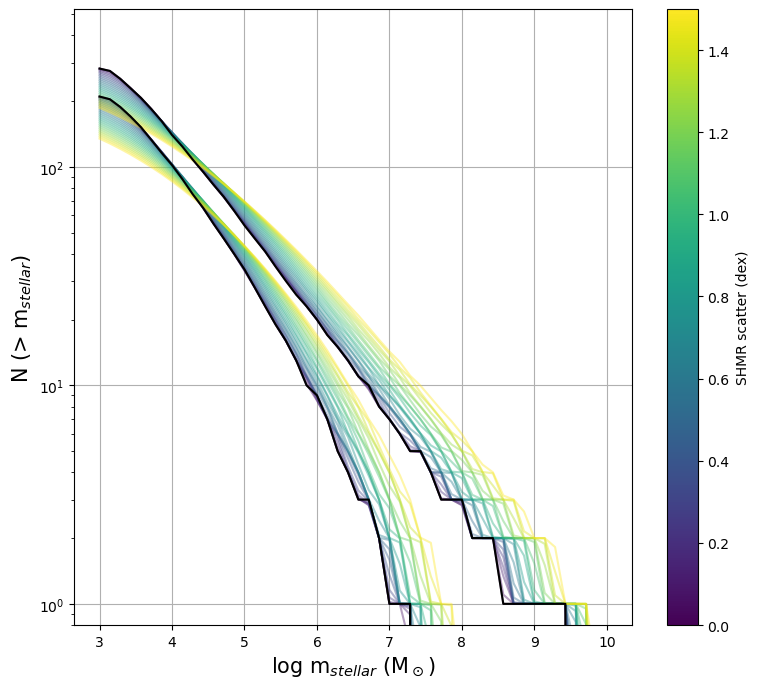

In [13]:
plt.figure(figsize=(9, 8)) # now plotting the color-coded CSMF!!

for i in range(scatter_pix):
    plt.plot(mass_range, across_samp[i][2], color=colors[i],alpha=0.4)
    #plt.plot(mass_range, across_samp[i][1], color=colors[i],alpha=0.4)
    plt.plot(mass_range, across_samp[i][0], color=colors[i],alpha=0.4)

plt.plot(mass_range, low, color="black")
#plt.plot(mass_range, median, color="black")
plt.plot(mass_range, high, color="black")


plt.yscale("log")
plt.grid()
plt.colorbar(cmap, label="SHMR scatter (dex)")
plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("N (> m$_{stellar}$)", fontsize=15)
plt.ylim(0.8)
#plt.savefig("../../figures/CSMF_with_det.png")
plt.show()

In [14]:
stat = H2H_CSMF(across_samp)
det_stat = high-low

median = across_samp[:,1,:]
det_median = CSMF_mat[1]
mass_ind = [8,15,22,29,35]
masses = np.round(mass_range[mass_ind],0)
colors = ["maroon", "red", "orange", "green", "navy"]


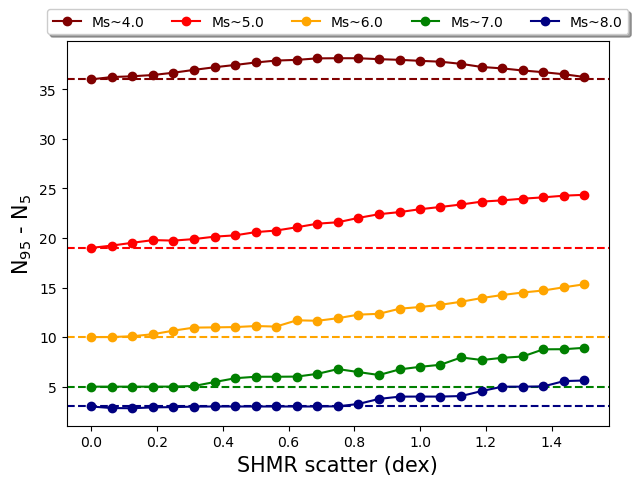

In [15]:

plt.figure(figsize=(7,5))

for i,val in enumerate(mass_ind):
    plt.plot(scatter_range, stat[:,val], label="Ms~"+str(masses[i]), color=colors[i],marker="o")
    plt.axhline(det_stat[val], ls="--", color=colors[i])

 
plt.xlabel("SHMR scatter (dex)", fontsize=15)
plt.ylabel("$\mathrm{N}_{95}$ - $\mathrm{N}_{5}$", fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
          ncol=5, fancybox=True, shadow=True)
#plt.savefig("../../figures/H2Hvar.png")
plt.show()



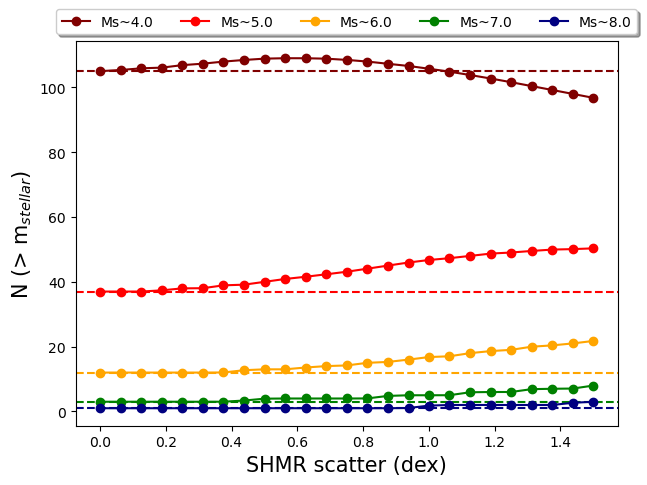

In [16]:

plt.figure(figsize=(7,5))

for i,val in enumerate(mass_ind):
    plt.plot(scatter_range, median[:,val], label="Ms~"+str(masses[i]), color=colors[i], marker="o")
    plt.axhline(det_median[val], ls="--", color=colors[i])

 
plt.xlabel("SHMR scatter (dex)", fontsize=15)
plt.ylabel("N (> m$_{stellar}$)", fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
          ncol=5, fancybox=True, shadow=True)
#plt.savefig("../../figures/CSMF_scatter.png")
plt.show()